In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.neighbors import KNeighborsClassifier
import mlxtend
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Concertriccir2 data

In [2]:
concertriccir2data=pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\Multiple CSV\Multiple CSV\3.concertriccir2.csv",header=None)

In [3]:
concertriccir2data.head()

0         1    2
0  0.700335 -0.247068  0.0
1 -3.950019  2.740080  1.0
2  0.150222 -2.157638  1.0
3 -1.672050 -0.941519  1.0
4  2.560483 -1.846577  1.0

In [4]:
fv=concertriccir2data.iloc[:,:2]
cv=concertriccir2data.iloc[:,-1]

In [5]:
fv

0         1
0    0.700335 -0.247068
1   -3.950019  2.740080
2    0.150222 -2.157638
3   -1.672050 -0.941519
4    2.560483 -1.846577
..        ...       ...
495  2.177895  2.984489
496  1.778905  2.869205
497  0.894180  3.069959
498  0.849439  3.875435
499  5.217443  1.400818

[500 rows x 2 columns]

In [6]:
cv.astype(int)

0      0
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    0
498    0
499    0
Name: 2, Length: 500, dtype: int32

In [7]:
std=StandardScaler()
p_fv=std.fit_transform(fv)

In [8]:
p_fv

array([[-6.13354968e-01, -1.06654257e+00],
       [-3.02368513e+00,  4.38420761e-01],
       [-8.98484672e-01, -2.02911254e+00],
       [-1.84298863e+00, -1.41641620e+00],
       [ 3.50780806e-01, -1.87239595e+00],
       [-1.87042218e+00,  8.03106170e-01],
       [-8.78088525e-01, -8.56037486e-02],
       [-1.14965515e+00, -4.23500280e-01],
       [ 6.29442651e-01, -2.29322213e+00],
       [-1.61939596e+00, -1.56036432e+00],
       [-1.17270891e+00, -5.64188946e-01],
       [ 5.37878583e-01, -1.99026467e+00],
       [-9.77732680e-01, -1.93715749e+00],
       [-5.88246693e-01, -8.43954741e-01],
       [-1.45290128e-01, -1.72573824e+00],
       [-7.19395061e-01, -1.87706744e+00],
       [ 9.53828826e-02, -2.40991508e+00],
       [-1.50821088e+00, -1.56035111e+00],
       [-1.52401528e+00,  2.63805612e-01],
       [-1.78310307e+00, -1.26452142e-01],
       [-1.72539140e+00, -3.75966090e-01],
       [-9.31816159e-01, -7.91640533e-01],
       [-8.87050894e-01, -1.37310486e-01],
       [-7.

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<AxesSubplot:>

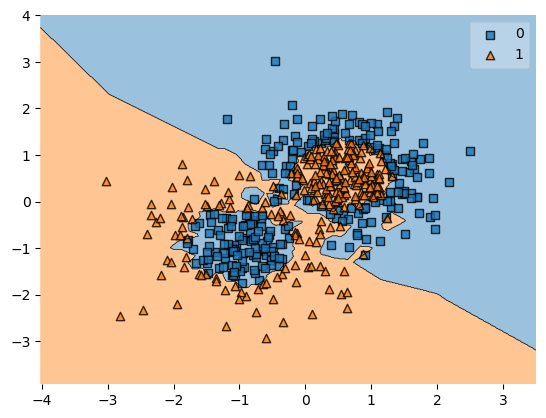

In [9]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(p_fv,cv.astype(int))
plot_decision_regions(X=p_fv,y=cv.astype(int).values,clf=knn)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

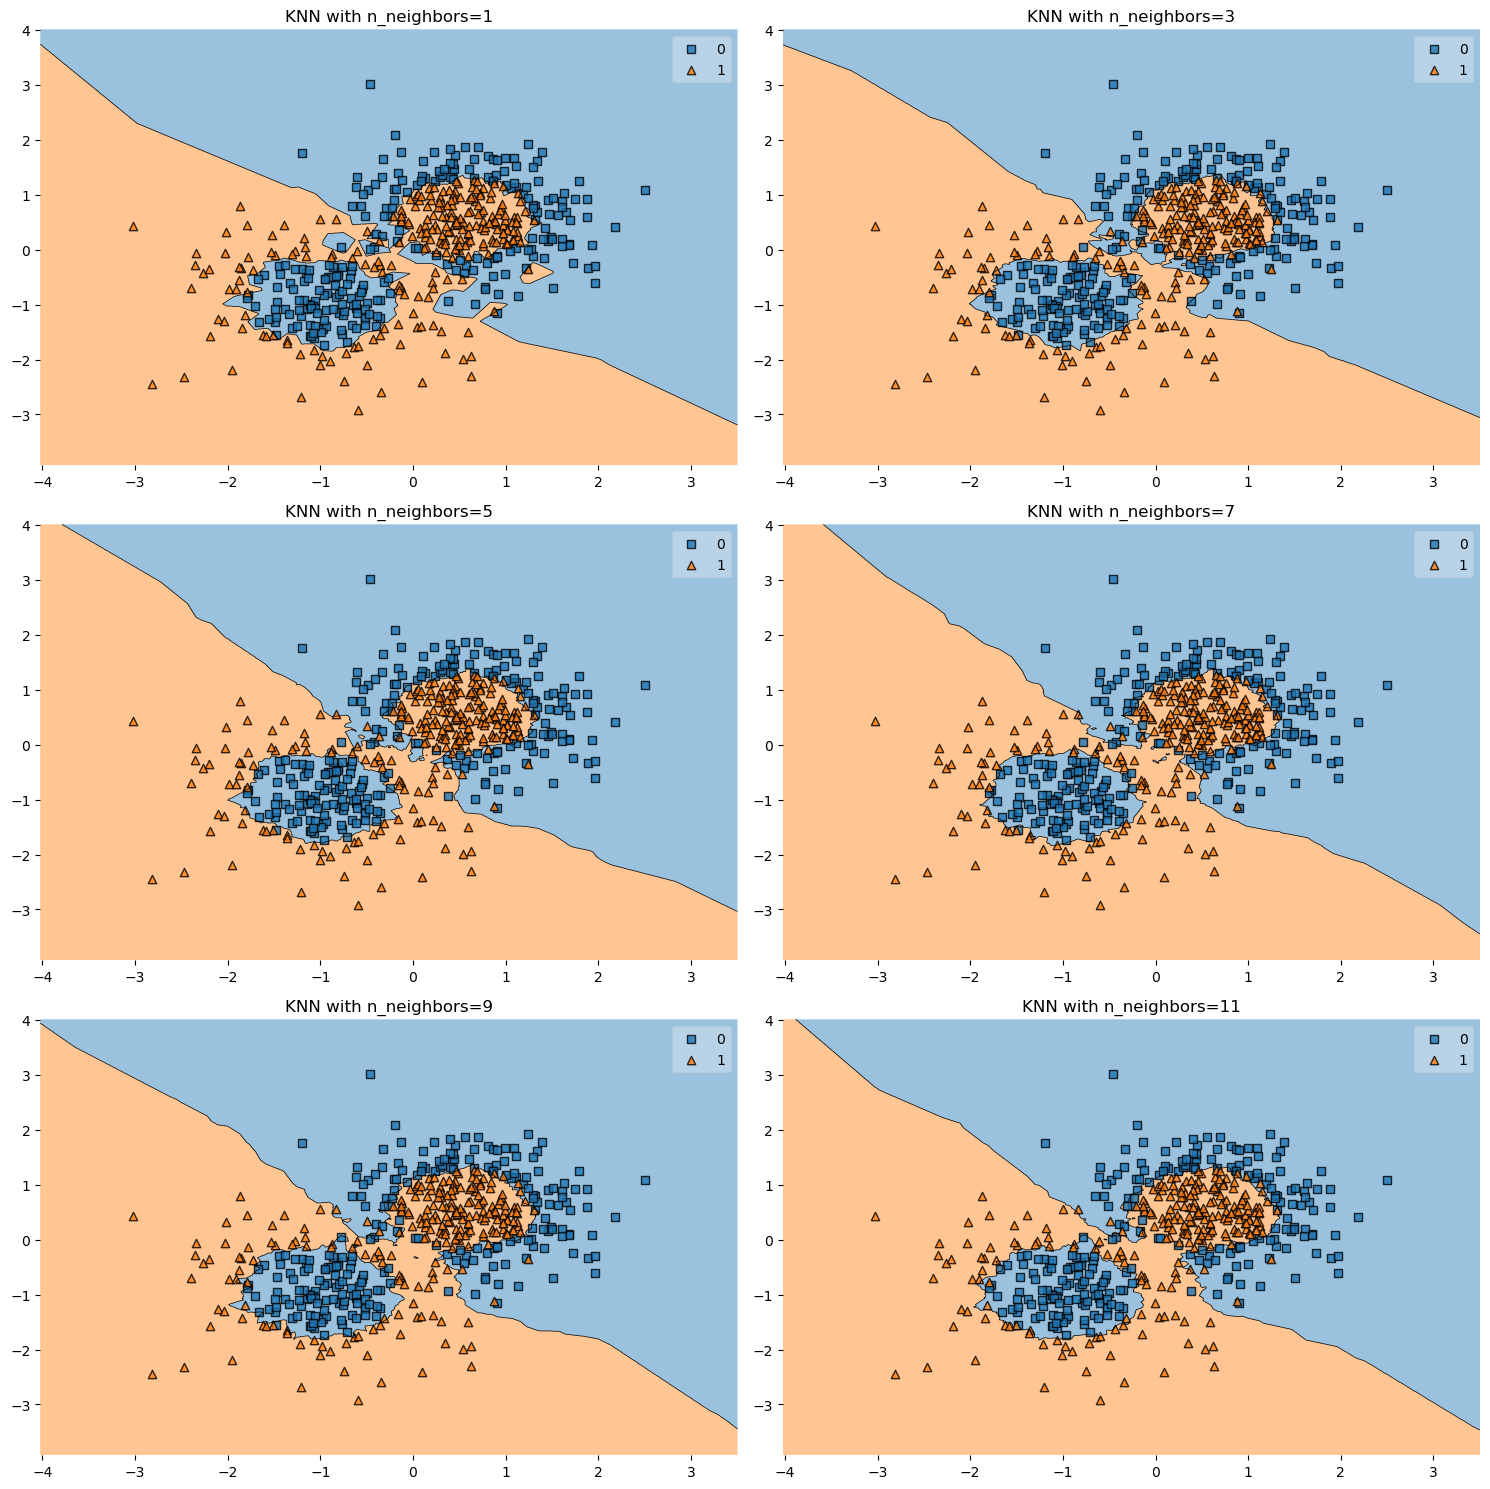

In [18]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, ax in zip(range(1, 12, 2), axes.flatten()):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(p_fv, cv.astype(int))
    plot_decision_regions(X=p_fv, y=cv.astype(int).values, clf=knn, ax=ax)
    ax.set_title(f'KNN with n_neighbors={i}')

plt.tight_layout()
plt.show()

## Using Accuracy method

In [12]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=1,stratify=cv)

In [13]:
std=StandardScaler()
px_train=std.fit_transform(x_train)
px_test=std.transform(x_test)

In [15]:
k=[]
acc=[]
err=[]

for i in range(1,400,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    model=knn.fit(px_train,y_train)
    predicted=model.predict(px_test)
    k.append(i)
    acc.append(accuracy_score(y_test,predicted))
    err.append(1-accuracy_score(y_test,predicted))

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

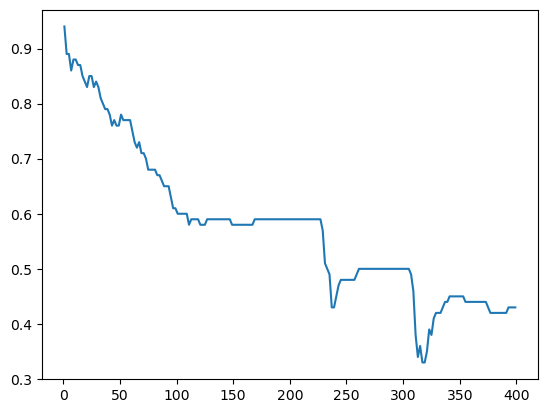

In [16]:
plt.plot(k,acc)